# Underage overdoses
Teens can overdose on a single substance or multiple substances simultaneously. When mind-altering substances are combined, the effects of each substance can grow even more pronounced, making an overdose more likely. For example, if a teen abuses alcohol (a depressant) and also abuses Adderall (a stimulant) at the same time, they are subject to a wider variety of risks.

The data above is about drug overdoses between years 1995 and 2017.

Text(0.5, 1.0, 'Underage overdoses per year')

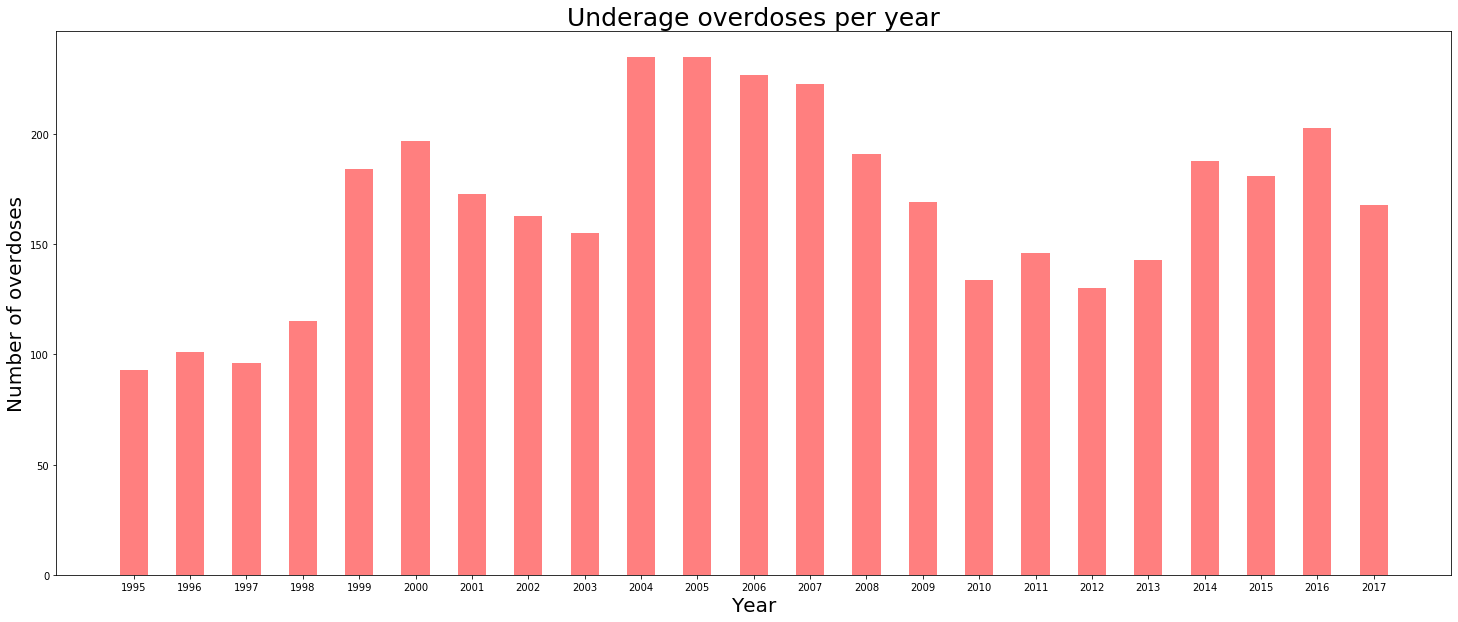

In [28]:
import pandas
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
f = pandas.read_excel("./tables/drugDeaths/deaths15-19.xlsx")
mrtvi=defaultdict(int)
for godina in range(2017,1994,-1):
    for i,j in f.iterrows():
        brojevi=np.sum(f[godina])
        mrtvi[godina]=brojevi
god=np.array([v for v in mrtvi.keys()])
br=np.array([v for v in mrtvi.values()])
plt.figure(figsize=(25,10))
plt.bar(god,br,align="center",width=0.5,alpha=0.5,color="red")
plt.xticks(god)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses per year",fontsize=25)

Text(0.5, 1.0, 'Underage overdoses by countries')

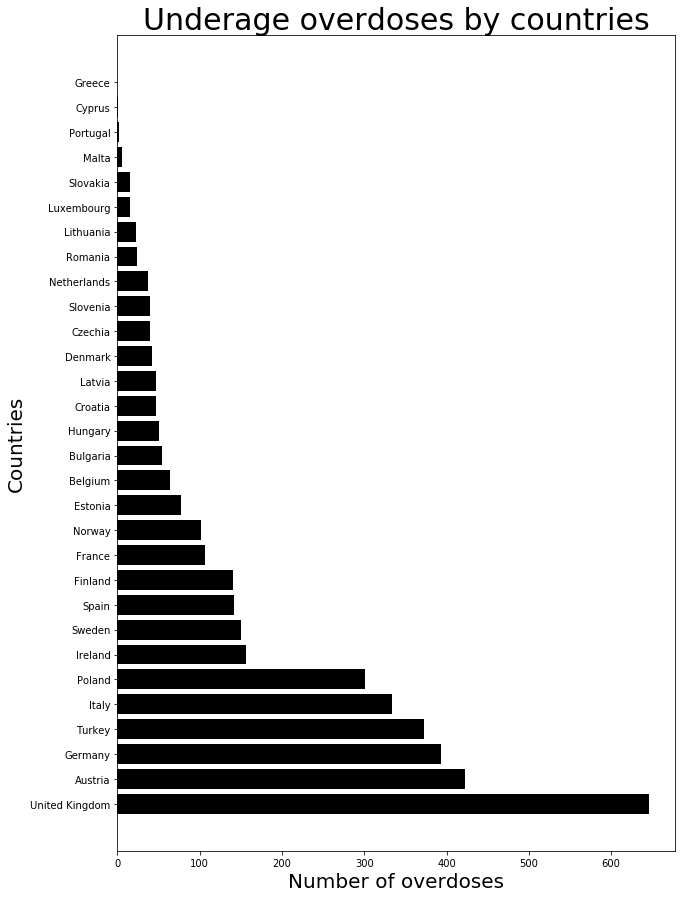

In [29]:
underage_zemlje={}
def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val
for i,row in f.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        underage_zemlje[country] = [row[col] for col in f.columns[:-1][1:]]
        nan_indx = np.isnan(underage_zemlje[country])
        replaceNan(underage_zemlje[country], nan_indx,0)
sortedzemlje = sorted(underage_zemlje, key = lambda k: sum(underage_zemlje[k]), reverse=True)
underage_deaths=[sum(underage_zemlje[i]) for i in sortedzemlje]
ypos=np.arange(len(sortedzemlje))
plt.figure(figsize=(10,15))
yt=np.array([v for v in sortedzemlje])
plt.yticks(ypos,yt)
plt.barh(ypos, underage_deaths, color="black")
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses by countries",fontsize=30)

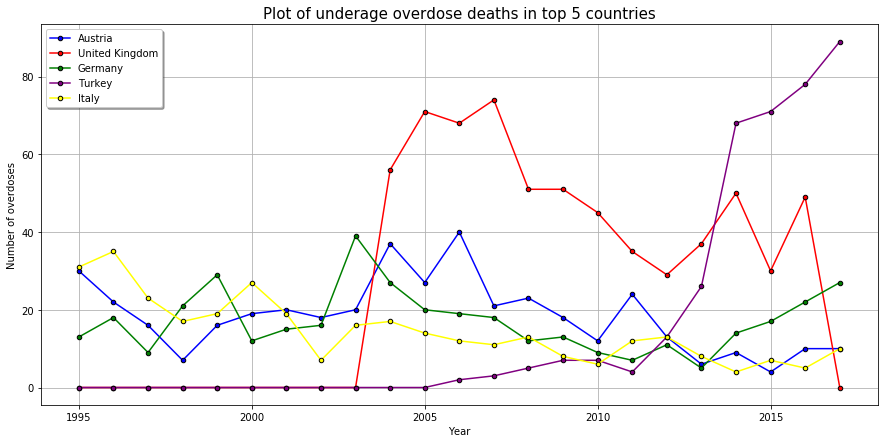

In [30]:
austria_underage=underage_zemlje["Austria"]
uk_underage=underage_zemlje["United Kingdom"]
germany_underage=underage_zemlje["Germany"]
turk_underage=underage_zemlje["Turkey"]
it_underage=underage_zemlje["Italy"]
godine=[i for i in range(2017,1994,-1)]
plt.figure(figsize=(15,7))
plt.plot(godine,austria_underage,color="blue",label="Austria",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,uk_underage,color="red",label="United Kingdom",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,germany_underage,color="green",label="Germany",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,turk_underage,color="purple",label="Turkey",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,it_underage,color="yellow",label="Italy",marker = ".", markersize = 9, markeredgecolor = "black")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Plot of underage overdose deaths in top 5 countries",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

Text(0.5, 1.0, 'Overdoses of people older than 60 years of age')

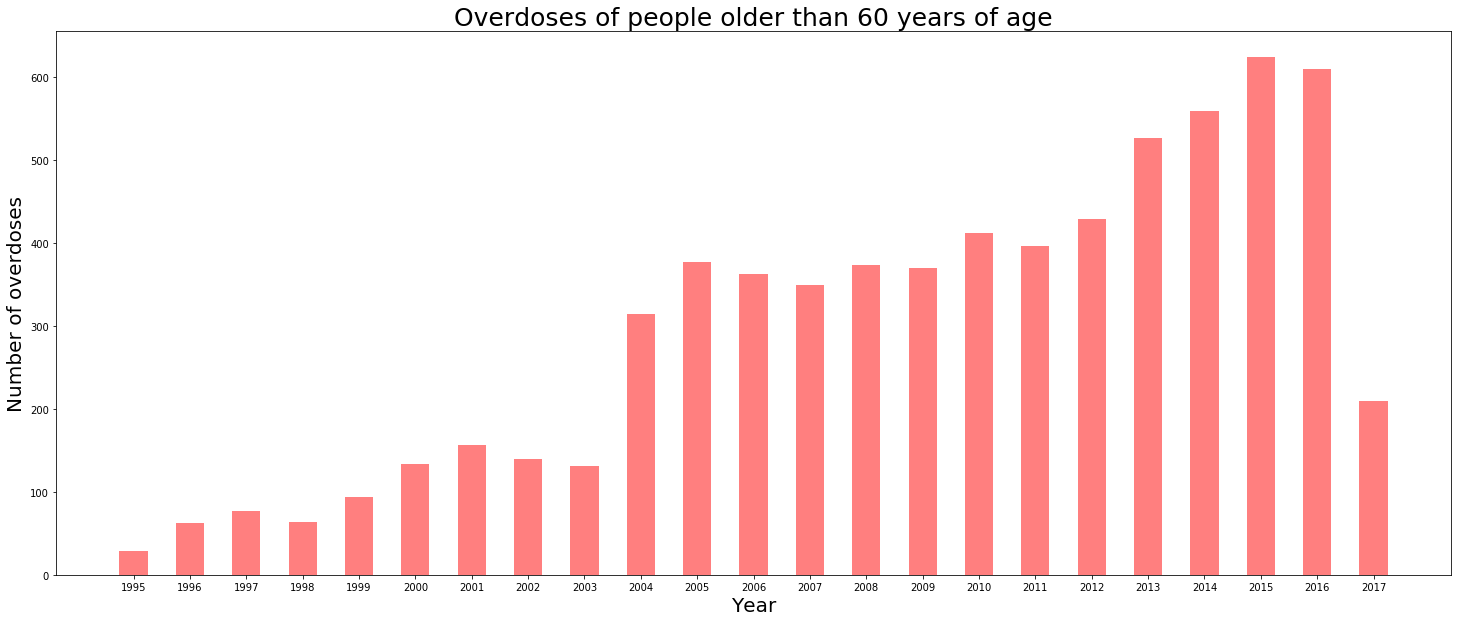

In [31]:
f2 = pandas.read_excel("./tables/drugDeaths/deaths60-64.xlsx")
f3=pandas.read_excel("./tables/drugDeaths/deaths65-inf.xlsx")
mrtvi2=defaultdict(int)
mrtvi3=defaultdict(int)
for godina in range(2017,1994,-1):
    for i,j in f2.iterrows():
        brojevi=np.sum(f2[godina])
        mrtvi2[godina]=brojevi
for godina in range(2017,1994,-1):
    for i,j in f3.iterrows():
        brojevi=np.sum(f3[godina])
        mrtvi3[godina]=brojevi
m1=[m for m in mrtvi2.values()]
m2=[m for m in mrtvi3.values()]
m3=[]
for i in range(len(m1)):
    m3.append(m1[i]+m2[i])
god2=np.array([v for v in mrtvi2.keys()])
plt.figure(figsize=(25,10))
plt.bar(god2,m3,align="center",width=0.5,alpha=0.5,color="red")
plt.xticks(god2)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of overdoses",fontsize=20)
plt.title("Overdoses of people older than 60 years of age",fontsize=25)

Text(0.5, 1.0, 'Overdoses of people older than 60 years of age by countries')

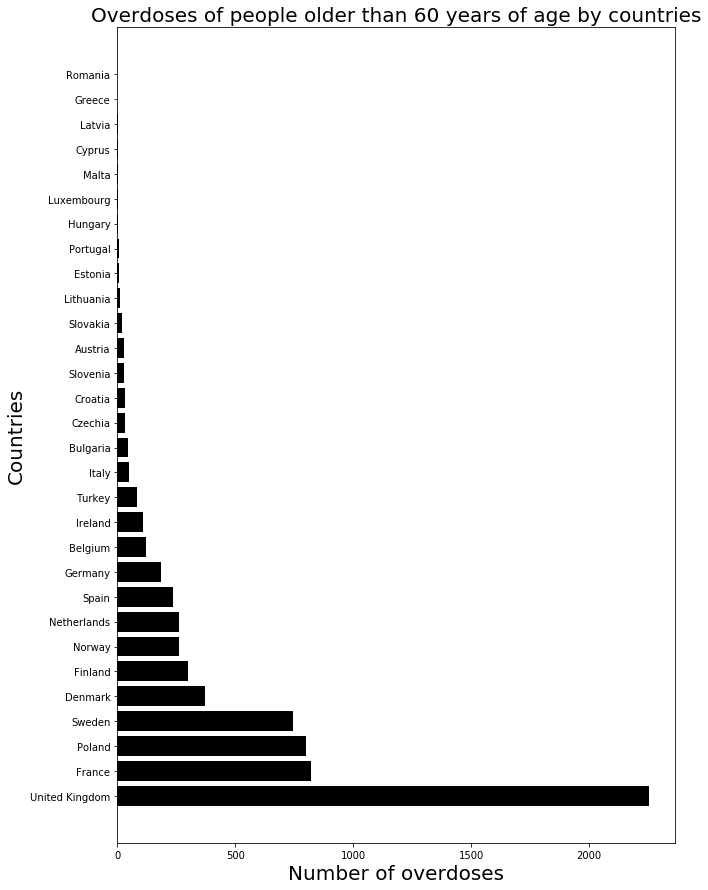

In [52]:
import operator
overage_zemlje1={}
for i,row in f2.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        overage_zemlje1[country] = [row[col] for col in f2.columns[:-1][1:]]
        nan_indx = np.isnan(overage_zemlje1[country])
        replaceNan(overage_zemlje1[country], nan_indx,0)
sortedzemlje1 = sorted(overage_zemlje1, key = lambda k: sum(overage_zemlje1[k]), reverse=True)
overage_deaths=defaultdict(int)
for i in sortedzemlje1:
    overage_deaths[i]=sum(overage_zemlje1[i])
overage_zemlje2={}
for i,row in f3.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        overage_zemlje2[country] = [row[col] for col in f3.columns[:-1][1:]]
        nan_indx = np.isnan(overage_zemlje2[country])
        replaceNan(overage_zemlje2[country], nan_indx,0)
overage_deaths1=defaultdict(int)
for i in sortedzemlje1:
    overage_deaths1[i]=sum(overage_zemlje2[i])
smrti=defaultdict(int)
for i in overage_deaths1.keys():
    smrti[i]=overage_deaths[i]+overage_deaths1[i]
smrti1=dict( sorted(smrti.items(), key=operator.itemgetter(1),reverse=True))
zemlje=[z for z in smrti1.keys()]
over=[o for o in smrti1.values()]
overage_zemlje3={}
ypos1=np.arange(len(zemlje))
plt.figure(figsize=(10,15))
yt1=np.array([v for v in zemlje])
plt.yticks(ypos1,yt1)
plt.barh(ypos1, over, color="black")
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Number of overdoses",fontsize=20)
plt.title("Overdoses of people older than 60 years of age by countries",fontsize=20)

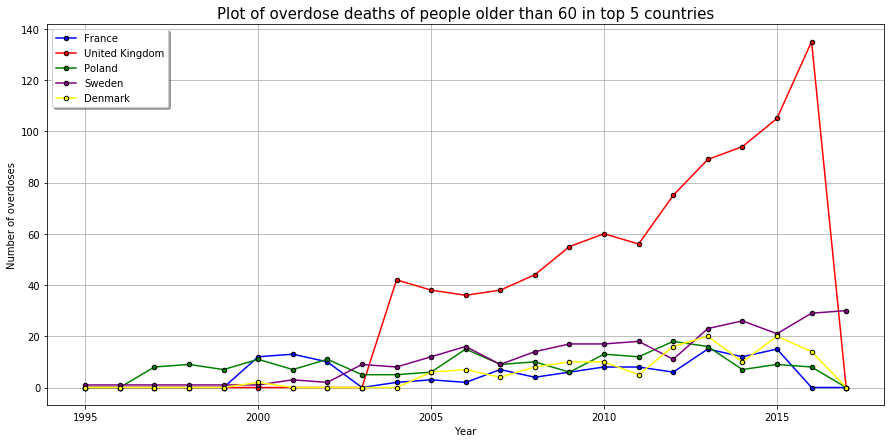

In [47]:
france_overage=overage_zemlje1["France"]
uk_overage=overage_zemlje1["United Kingdom"]
poland_overage=overage_zemlje1["Poland"]
sweden_overage=overage_zemlje1["Sweden"]
den_overage=overage_zemlje1["Denmark"]
godine=[i for i in range(2017,1994,-1)]
plt.figure(figsize=(15,7))
plt.plot(godine,france_overage,color="blue",label="France",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,uk_overage,color="red",label="United Kingdom",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,poland_overage,color="green",label="Poland",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,sweden_overage,color="purple",label="Sweden",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,den_overage,color="yellow",label="Denmark",marker = ".", markersize = 9, markeredgecolor = "black")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Plot of overdose deaths of people older than 60 in top 5 countries",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()